In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("AirQualityUCI.csv",delimiter=";")

In [3]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [4]:
df.describe()

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,NaN,NaN
std,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,NaN,NaN
50%,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,NaN,NaN
75%,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,NaN,NaN
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,NaN,NaN


In [5]:
df=df.drop(["Unnamed: 15","Unnamed: 16"],axis=1)

In [6]:
df.isnull().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [7]:
df.shape

(9471, 15)

In [8]:
df=df.dropna(axis=0)

In [9]:
df.shape

(9357, 15)

In [10]:

df.sample(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
3555,05/08/2004,21.00.00,-200,1002.0,-200.0,"5,4",783.0,79.0,805.0,92.0,1623.0,875.0,"20,7","81,8","1,9717"
8684,07/03/2005,14.00.00,"1,2",891.0,-200.0,"4,5",740.0,177.0,919.0,124.0,788.0,502.0,"10,0","25,2","0,3079"
2845,07/07/2004,07.00.00,"4,1",1425.0,-200.0,"27,3",1486.0,392.0,512.0,136.0,2305.0,1869.0,"24,8","38,4","1,1808"
8106,11/02/2005,12.00.00,"4,3",-200.0,-200.0,"-200,0",-200.0,702.0,-200.0,250.0,-200.0,-200.0,-200,-200,-200
3005,13/07/2004,23.00.00,"1,9",971.0,-200.0,"11,0",1014.0,155.0,788.0,111.0,1585.0,1115.0,"24,3","31,1","0,9316"
4774,25/09/2004,16.00.00,"1,1",815.0,-200.0,"4,6",743.0,54.0,1183.0,21.0,1095.0,536.0,"22,1","24,8","0,6514"
4267,04/09/2004,13.00.00,"1,8",1062.0,-200.0,"9,8",969.0,-200.0,729.0,-200.0,1459.0,782.0,"37,1","21,2","1,3107"
5906,11/11/2004,20.00.00,"4,7",1282.0,-200.0,"20,6",1312.0,568.0,551.0,177.0,1671.0,1312.0,"12,9","68,8","1,0175"
8262,18/02/2005,00.00.00,"1,2",975.0,-200.0,"3,3",670.0,129.0,943.0,105.0,910.0,616.0,"6,9","48,7","0,4874"
8055,09/02/2005,09.00.00,"2,7",-200.0,-200.0,"-200,0",-200.0,424.0,-200.0,245.0,-200.0,-200.0,-200,-200,-200


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
dtypes: float64(8), object(7)
memory usage: 1.1+ MB


In [12]:
#Cleaning the data
df["CO(GT)"]=df["CO(GT)"].str.replace(",",".")

In [13]:
df["T"]=df["T"].str.replace(",",".")
df["RH"]=df["RH"].str.replace(",",".")
df["AH"]=df["AH"].str.replace(",",".")
df["C6H6(GT)"]=df["C6H6(GT)"].str.replace(",",".")

In [14]:
df.sample(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9179,28/03/2005,05.00.00,0.6,938.0,-200.0,1.9,575.0,97.0,955.0,63.0,1195.0,585.0,13.8,79.0,1.2425
1651,18/05/2004,13.00.00,2.9,1261.0,-200.0,17.0,1210.0,173.0,736.0,126.0,1769.0,1200.0,30.9,19.1,0.8394
4121,29/08/2004,11.00.00,-200,1003.0,-200.0,6.8,849.0,-200.0,800.0,-200.0,1511.0,710.0,32.3,31.8,1.5128
6777,18/12/2004,03.00.00,1.3,1058.0,-200.0,4.3,727.0,-200.0,834.0,-200.0,1193.0,860.0,12.2,74.5,1.0537
657,07/04/2004,03.00.00,0.3,801.0,30.0,0.7,464.0,-200.0,1749.0,-200.0,1154.0,340.0,16.1,42.4,0.7718
3838,17/08/2004,16.00.00,-200,1026.0,-200.0,6.0,813.0,-200.0,843.0,-200.0,1463.0,692.0,38.8,19.8,1.3513
2220,11/06/2004,06.00.00,1,912.0,-200.0,7.0,858.0,92.0,923.0,69.0,1608.0,894.0,19.8,50.4,1.1525
541,02/04/2004,07.00.00,2.6,1386.0,284.0,13.0,1083.0,159.0,798.0,109.0,1833.0,1159.0,11.9,73.7,1.0254
7601,21/01/2005,11.00.00,4.2,1440.0,-200.0,20.5,1311.0,815.0,482.0,183.0,1476.0,2022.0,9.3,54.5,0.6415
3006,14/07/2004,00.00.00,1.4,927.0,-200.0,8.8,930.0,108.0,840.0,89.0,1522.0,1026.0,23.6,33.8,0.9685


In [15]:
#changing date format
df["Date"]=pd.to_datetime(df["Date"],format="%d/%m/%Y")

In [16]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10,19.00.00,2,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [17]:
#changing time format
df["Time"]=pd.to_datetime(df["Time"],format="%H.%M.%S").dt.time

In [18]:
#Replacing bad sensor readings designated by an entry of -200 with NaN
df.replace(-200,np.NaN,inplace=True)

In [19]:
#checking datatypes of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   object        
 3   PT08.S1(CO)    8991 non-null   float64       
 4   NMHC(GT)       914 non-null    float64       
 5   C6H6(GT)       9357 non-null   object        
 6   PT08.S2(NMHC)  8991 non-null   float64       
 7   NOx(GT)        7718 non-null   float64       
 8   PT08.S3(NOx)   8991 non-null   float64       
 9   NO2(GT)        7715 non-null   float64       
 10  PT08.S4(NO2)   8991 non-null   float64       
 11  PT08.S5(O3)    8991 non-null   float64       
 12  T              9357 non-null   object        
 13  RH             9357 non-null   object        
 14  AH             9357 non-null   object        
dtypes: datetime64[ns](1),

In [20]:
#changing datatype 
df[["CO(GT)","T","RH","AH","C6H6(GT)"]]=df[["CO(GT)","T","RH","AH","C6H6(GT)"]].astype("float64")

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    8991 non-null   float64       
 4   NMHC(GT)       914 non-null    float64       
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  8991 non-null   float64       
 7   NOx(GT)        7718 non-null   float64       
 8   PT08.S3(NOx)   8991 non-null   float64       
 9   NO2(GT)        7715 non-null   float64       
 10  PT08.S4(NO2)   8991 non-null   float64       
 11  PT08.S5(O3)    8991 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [22]:
#Determining the null value perecntage in each columns
(df.isnull().sum()/len(df))*100

Date              0.000000
Time              0.000000
CO(GT)            0.000000
PT08.S1(CO)       3.911510
NMHC(GT)         90.231912
C6H6(GT)          0.000000
PT08.S2(NMHC)     3.911510
NOx(GT)          17.516298
PT08.S3(NOx)      3.911510
NO2(GT)          17.548360
PT08.S4(NO2)      3.911510
PT08.S5(O3)       3.911510
T                 0.000000
RH                0.000000
AH                0.000000
dtype: float64

In [23]:
#As we can see more than 90% data in this column is NaN its better to drop the column
df.drop(["NMHC(GT)"],axis=1,inplace=True)

In [24]:
 df

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10,19:00:00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10,20:00:00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10,21:00:00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10,22:00:00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,2005-04-04,11:00:00,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,2005-04-04,12:00:00,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,2005-04-04,13:00:00,2.1,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


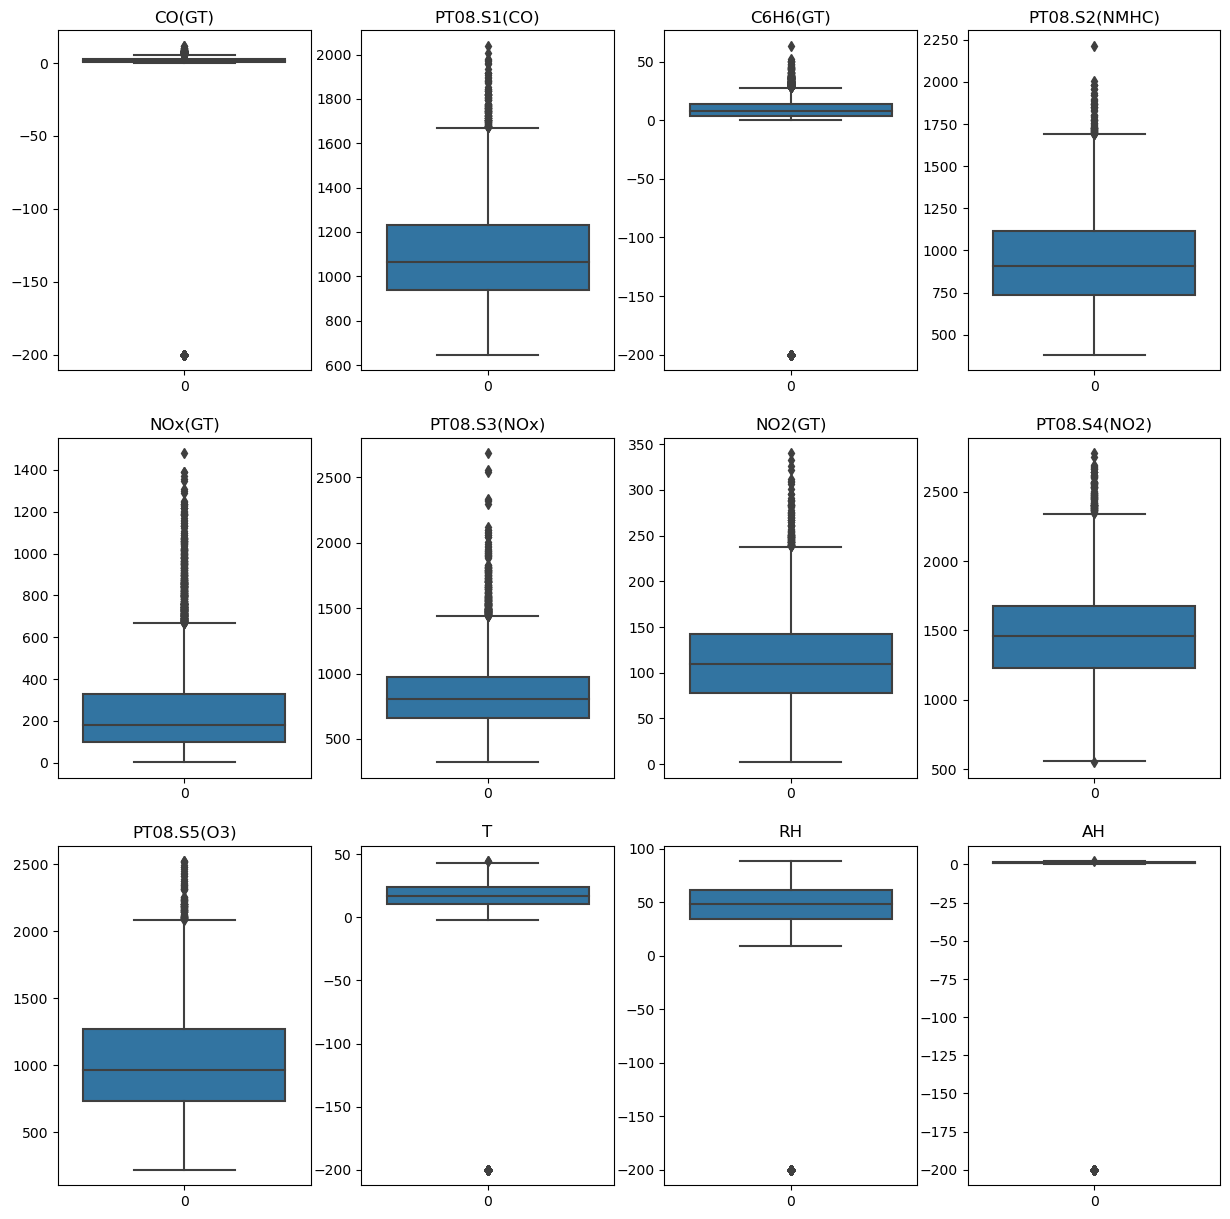

In [25]:
#plotting graph to check outliers
plt.figure(figsize=(15,15))
column=list(df.columns)[2:]
for c,col in enumerate(column):
    ax = o=plt.subplot(3,4,c+1)
    sns.boxplot(df[col])
    plt.title(col)

In [26]:
df.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

In [27]:
Q1 = df.quantile(0.25)
print(Q1)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.4*IQR
upper = Q3 + 1.4*IQR

condition = ~((df[column] < lower) | (df[column] > upper)).any(axis =1)

DF1=df[condition]

CO(GT)              0.6000
PT08.S1(CO)       937.0000
C6H6(GT)            4.0000
PT08.S2(NMHC)     734.5000
NOx(GT)            98.0000
PT08.S3(NOx)      658.0000
NO2(GT)            78.0000
PT08.S4(NO2)     1227.0000
PT08.S5(O3)       731.5000
T                  10.9000
RH                 34.1000
AH                  0.6923
Name: 0.25, dtype: float64


In [28]:
#Checking number of rows after remob=ving outliers
len(df)-len(DF1)

2869

In [29]:
import sys
sys.version

'3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]'

<Axes: >

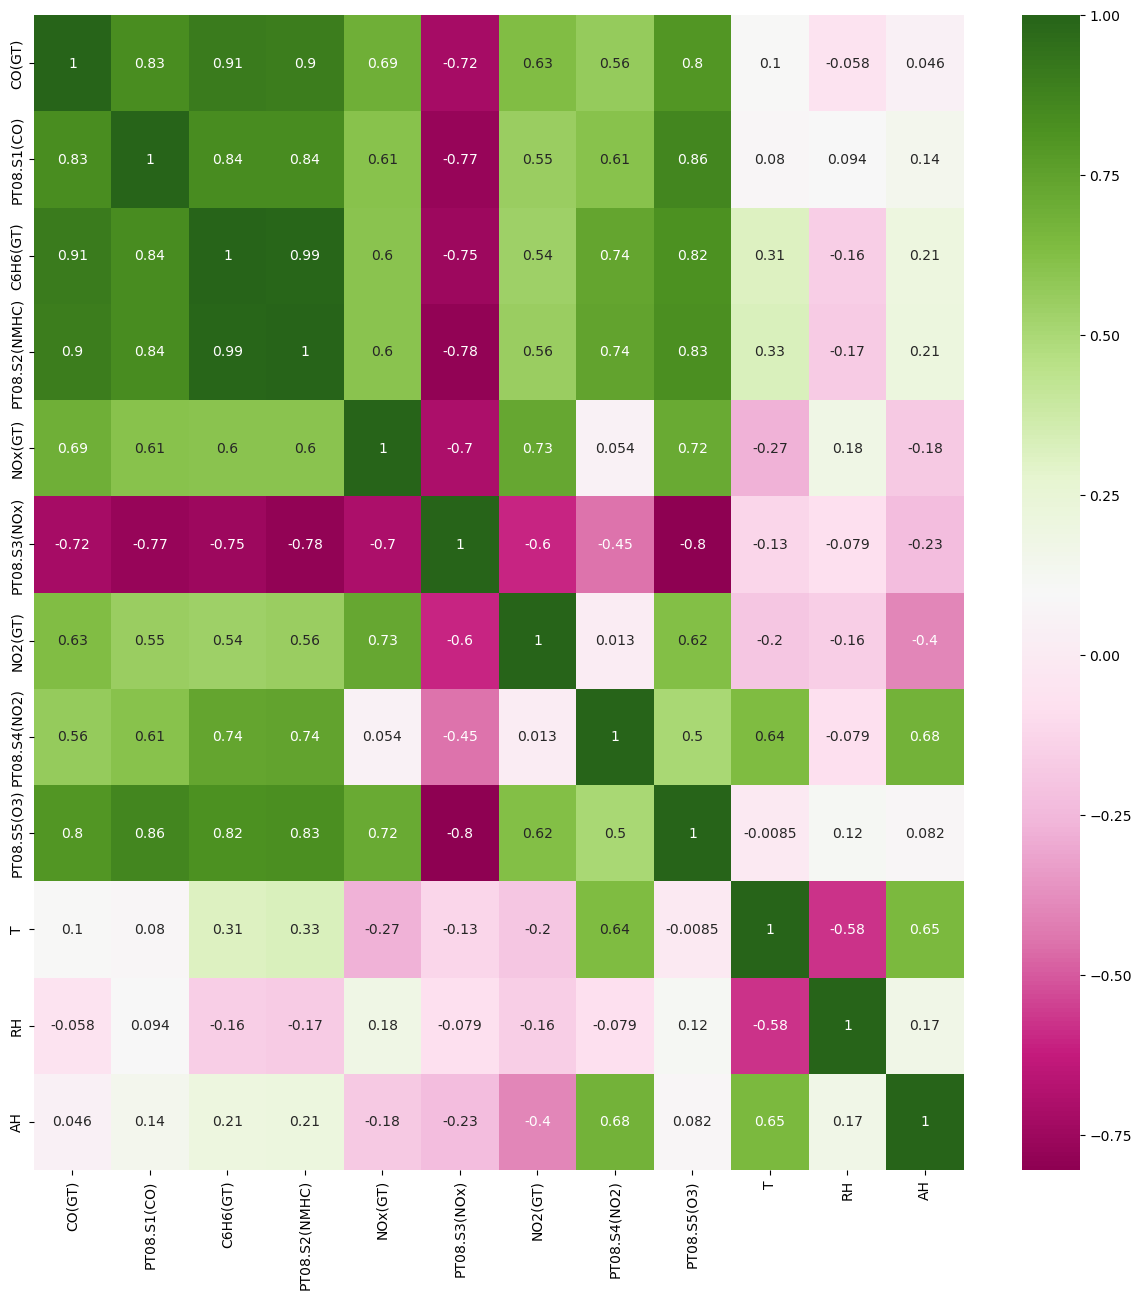

In [30]:
#Let's check the correlation coefficient to see which variables are highly co-related
plt.figure(figsize=(15,15))
sns.heatmap(DF1.corr(),cmap="PiYG",annot=True)

In [31]:
temp = DF1.iloc[:,2:]
temp.to_csv("Air_Quality.csv",index=False)

# Building a Linear Model

In [32]:
#importing required libariars
import statsmodels.api  as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
DF1.drop(['Date','Time'],axis = 1,inplace=True)
scale = MinMaxScaler()
col = list(DF1.columns)
DF1[col] = scale.fit_transform(DF1[col])

In [35]:
DF1.dropna(subset=['NOx(GT)','NO2(GT)'],axis=0,inplace=True)

In [36]:
DF1.isnull().sum()

CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [37]:
x = DF1.drop(['CO(GT)'],axis = 1)
y = DF1['CO(GT)']

In [38]:
X_train,X_test,Y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [39]:
model = LinearRegression()

In [40]:
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

In [41]:
import pickle

In [42]:
pickle.dump(model,open("model.sav","wb"))

In [43]:
from sklearn.metrics import r2_score

In [44]:
r2_score(y_test,y_pred)

0.8797156434618852

# Residual Analysis of Train Data

In [45]:
y_train_pred = model.predict(X_train)

Text(0.5, 0, 'Errors')

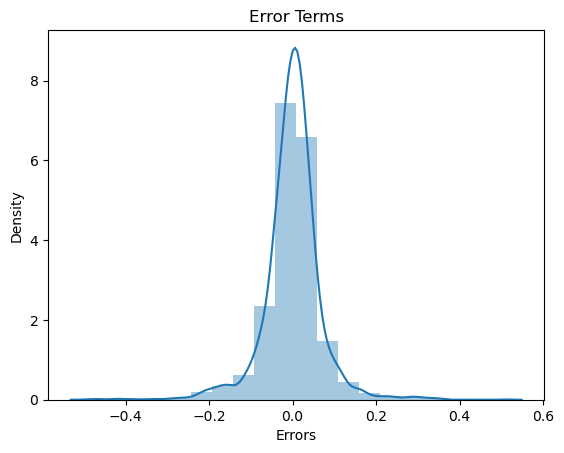

In [46]:
sns.distplot((Y_train - y_train_pred),bins=20)
plt.title("Error Terms")
plt.xlabel("Errors")

# Model Evaluation

Text(0, 0.5, 'Y_test')

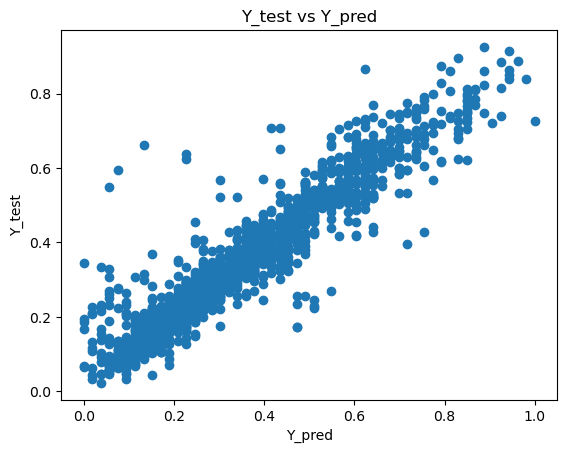

In [47]:
plt.scatter(y_test,y_pred)
plt.title("Y_test vs Y_pred")
plt.xlabel("Y_pred")
plt.ylabel("Y_test")

We can see that the equation of our best fitted line is:

$ CO(GT) = 0.2022 \times PT08.S1(CO) + 0.5273 \times C6H6(GT) + 0.1490 \times PT08.S2(NMHC) + 0.1573 \times NOx(GT) + 0.1007 \times PT08.S3(NOx) + 0.1287 \times NO2(GT) + 0.0771 \times PT08.S4(NO2) + -0.1117 \times PT08.S5(O3) + -0.1766 \times T + -0.0464 \times RH + 0.0509 \times AH	$

In [48]:
model.coef_

array([ 0.2022421 ,  0.52727959,  0.14904005,  0.15733132,  0.10066768,
        0.12868069,  0.07714966, -0.11172085, -0.176577  , -0.04637985,
        0.05090279])

ValueError: Invalid RGBA argument: 'green '

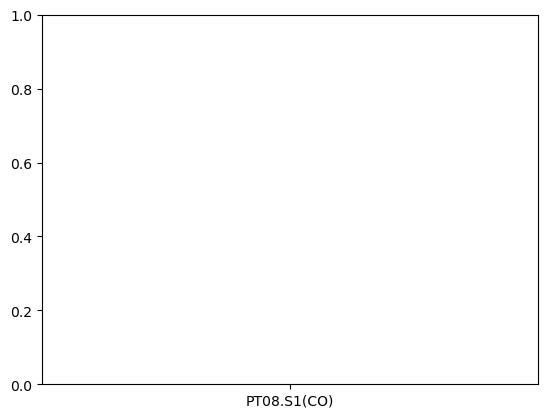

In [50]:
col = list(X_train.columns)

plt.bar(col,model.coef_, color = ["green " if coef > 0 else "red" for coef in model.coef_])
plt.xlabel("Features")
plt.ylabel("Model coefficients")
plt.xticks(rotation=45, ha="right")
plt.show()